# Data 911 call 

In [10]:
import numpy as num
import pandas as pan

In [5]:
import matplotlib.pyplot as plot
import seaborn as sea
%matplotlib inline

Import data 

In [13]:
data = pan.read_csv('911.csv')

In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


1. Top 5 zipcodes for 911 calls
1. Top 5 twp (townships) for 911 calls

In [18]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [19]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

3. Create "reason" colume for most common "title"

In [26]:
data['Reasons'] = data['title'].apply(lambda title: title.split(':')[0])

In [28]:
data['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

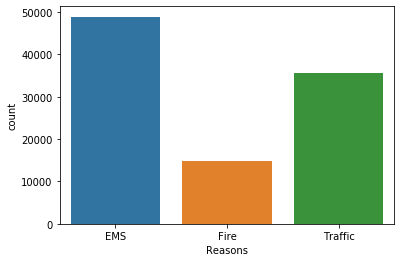

In [29]:
sea.countplot(x = 'Reasons', data = data)

4. Convert string to DateTime objects

In [30]:
type(data['timeStamp'][0])

str

In [34]:
data['timeStamp'] = pan.to_datetime(data['timeStamp'])

Create 3 new columns Hour, Month, Date fron timeStamp

In [35]:
time = data['timeStamp'].iloc[0]

In [37]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Date'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [38]:
dateconv = {0:'Mon', 1:'Tue', 2: 'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [39]:
data['Date'] = data['Date'].map(dateconv)

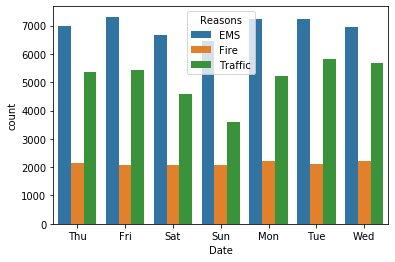

In [40]:
sea.countplot(x = 'Date', data = data, hue = 'Reasons')

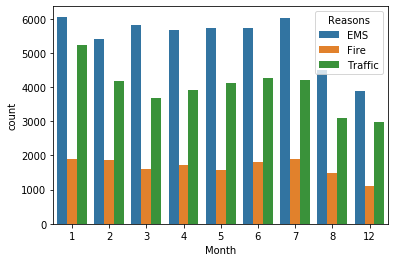

In [41]:
sea.countplot(x = 'Month', data = data, hue = 'Reasons')

5. Create linear fit on number of call per month 

In [44]:
groupM = data.groupby('Month').count()

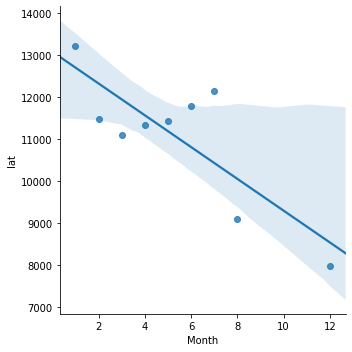

In [46]:
sea.lmplot(x = 'Month', y = 'lat', data = groupM.reset_index())

In [47]:
data['Day'] = data['timeStamp'].apply(lambda time: time.date())

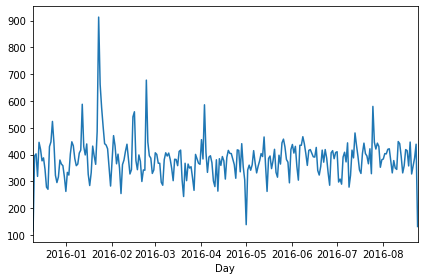

In [52]:
data.groupby('Day').count()['twp'].plot()
plot.tight_layout()

Text(0.5, 1, 'Reason of call is EMS')

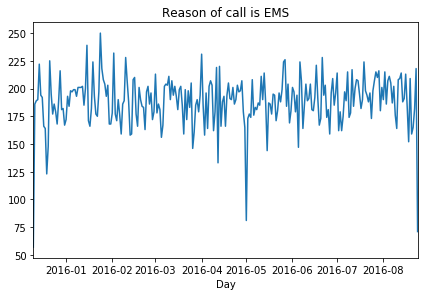

In [54]:
data[data['Reasons'] == 'EMS'].groupby('Day').count()['twp'].plot()
plot.tight_layout()
plot.title('Reason of call is EMS')

6. Multi-level

In [55]:
data.groupby(by = ['Date', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reasons  \
Date Hour                                                                   
Fri  0     275  275   275  248    275        275  275   275  275      275   
     1     235  235   235  200    235        235  235   232  235      235   
     2     191  191   191  165    191        191  191   191  191      191   
     3     175  175   175  164    175        175  175   175  175      175   
     4     201  201   201  184    201        201  201   201  201      201   
...        ...  ...   ...  ...    ...        ...  ...   ...  ...      ...   
Wed  19    686  686   686  590    686        686  686   682  686      686   
     20    668  668   668  597    668        668  668   662  668      668   
     21    575  575   575  508    575        575  574   572  575      575   
     22    490  490   490  432    490        490  490   485  490      490   
     23    335  335   335  294    335        335  334   335  335      335   

           Month  Day  
Date Hour              
Fri  0       275  275  
     1       235  235  
     2       191  191  
     3       175  175  
     4       201  201  
...          ...  ...  
Wed  19      686  686  
     20      668  668  
     21      575  575  
     22      490  490  
     23      335  335  

[168 rows x 12 columns]

In [68]:
#Convert to data frame
day_month = data.groupby(by = ['Date', 'Month']).count()['Reasons'].unstack()

<Figure size 864x432 with 0 Axes>

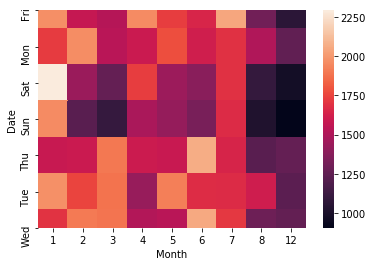

<Figure size 864x432 with 0 Axes>

In [69]:
#heatmap
sea.heatmap(day_month)
plot.figure(figsize= (12,6))